Predict Fare of Airlines Tickets using Machine Learning

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [73]:
data=pd.read_excel(r"C:\Users\User\Desktop\mənə-özəl\Projects\project-1\Data_Train.xlsx")


In [74]:
df=data.copy()

In [75]:
df.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [77]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [78]:
df.shape

(10683, 11)

In [79]:
df[df["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [80]:
df[df["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [81]:
df.dropna(inplace=True)

In [82]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [83]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [84]:
def change_into_datatime(col):
    df[col]=pd.to_datetime(df[col])

In [85]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [86]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datatime(i);

C:\Users\User\AppData\Local\Temp\ipykernel_13000\550762088.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col]=pd.to_datetime(df[col])


In [87]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [88]:
df["Date_of_Journey"].min()

Timestamp('2019-01-03 00:00:00')

In [89]:
df["Date_of_Journey"].max()

Timestamp('2019-12-06 00:00:00')

In [90]:
df["Journey_day"]=df["Date_of_Journey"].dt.day

In [91]:
df["Journey_month"]=df["Date_of_Journey"].dt.month

In [92]:
df["Journey_year"]=df["Date_of_Journey"].dt.year

In [93]:
df.drop(columns="Date_of_Journey",axis=1,inplace=True)

In [94]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year'],
      dtype='object')

In [95]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-01-31 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-31 05:50:00,2023-01-31 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [96]:
def extract_hour_min(d1,col):
    d1[col+"_hour"]=d1[col].dt.hour
    d1[col+"_minute"]=d1[col].dt.minute
    d1.drop(columns=col,axis=1,inplace=True)
    return d1.head()


In [97]:
extract_hour_min(df,"Arrival_Time")

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-01-31 22:20:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-31 05:50:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-01-31 09:25:00,19h,2 stops,No info,13882,6,9,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-01-31 18:05:00,5h 25m,1 stop,No info,6218,5,12,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-01-31 16:50:00,4h 45m,1 stop,No info,13302,3,1,2019,21,35


In [98]:
extract_hour_min(df,"Dep_Time")

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50


In [99]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early mrng"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"


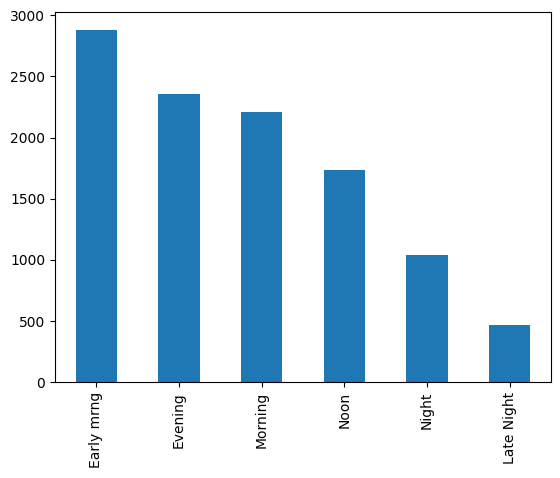

In [100]:
df["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar");

In [101]:
def preprocess_duration(x):
    if "h" not in x:
        x="0h " + x
    elif "m" not in x:
        x=x + " 0m"
    return x
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50


In [102]:
df["Duration"]=df["Duration"].apply(preprocess_duration)

In [103]:
int(df["Duration"][0].split(" ")[0][0:-1])

2

In [104]:
int(df["Duration"][1].split(" ")[0][0:-1])

7

In [105]:
df["Duration_hours"]=df["Duration"].apply(lambda x:int(x.split(" ")[0][0:-1]))

In [106]:
df["Duration_mins"]=df["Duration"].apply(lambda x:int(x.split(" ")[1][0:-1]))

In [107]:
df["Duration_totals_min"]=df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [108]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_totals_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170


In [109]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

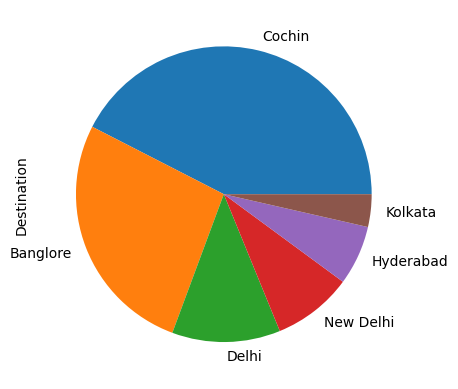

In [110]:
df["Destination"].value_counts().plot(kind="pie");

In [111]:
df[df["Airline"]=="Jet Airways"].groupby("Route").size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

<AxesSubplot: xlabel='Airline', ylabel='Price'>

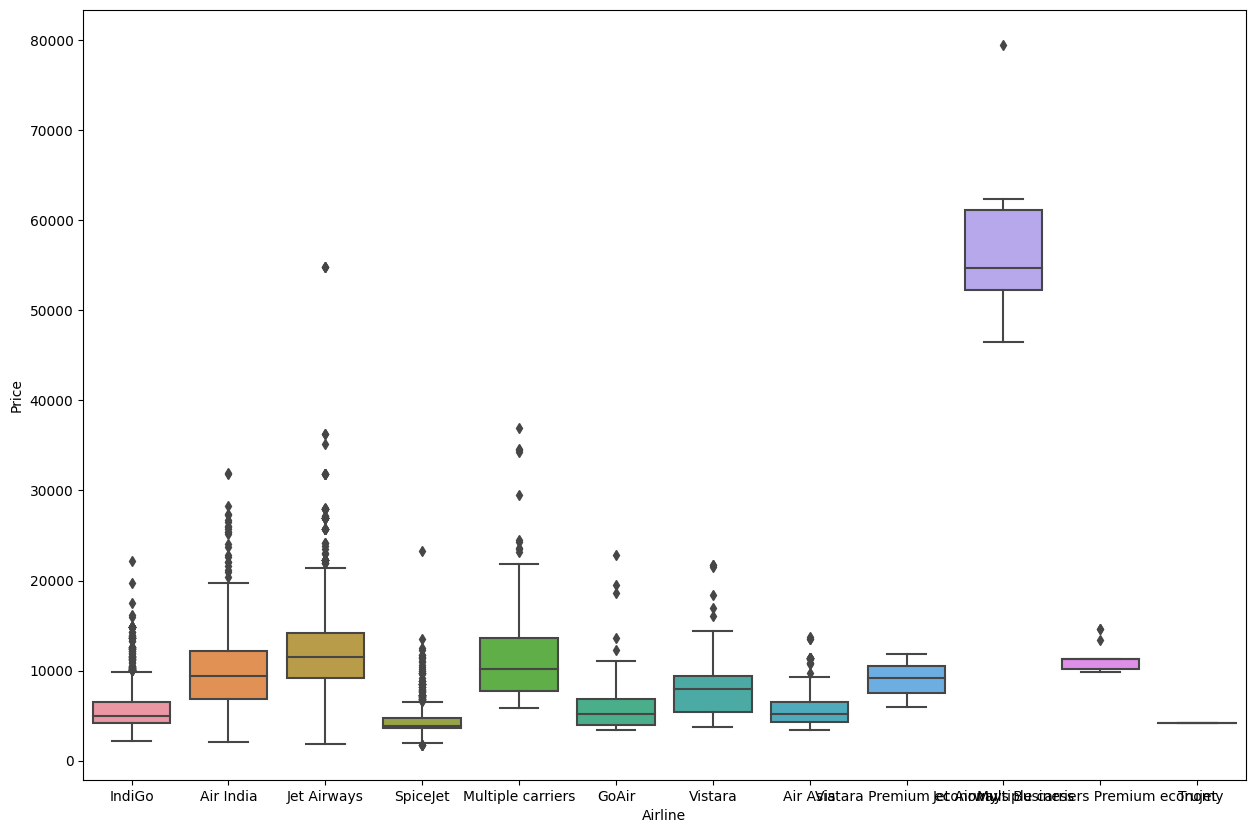

In [112]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Airline",y="Price",data=df)

In [113]:
df.drop(columns=["Additional_Info","Route","Duration_totals_min","Journey_year"],axis=1,inplace=True)

In [114]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [115]:
df.dtypes

Airline                object
Source                 object
Destination            object
Duration               object
Total_Stops            object
Price                   int64
Journey_day             int64
Journey_month           int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_hours          int64
Duration_mins           int64
dtype: object

In [116]:
cat_col=[col for col in df.columns if df[col].dtype=="object"]
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [117]:
nme_col=[col for col in df.columns if df[col].dtype!="object"]
nme_col

['Price',
 'Journey_day',
 'Journey_month',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [118]:
df1=pd.get_dummies(df["Source"],prefix="Source")

In [119]:
df=pd.concat([df,df1],axis=1)

In [120]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,18,5,5,25,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,4,9,22,25,19,55,2,30,0,0,0,1,0
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,23,20,20,45,2,35,0,0,0,1,0
10680,Jet Airways,Banglore,Delhi,3h 0m,non-stop,7229,27,4,11,20,8,20,3,0,1,0,0,0,0
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,3,1,14,10,11,30,2,40,1,0,0,0,0


In [121]:
airlines=df.groupby(["Airline"])["Price"].mean().sort_values().index

In [122]:
ordinal_airline=pd.Categorical(df["Airline"],categories=airlines,ordered=True)
ordinal_airline

['IndiGo', 'Air India', 'Jet Airways', 'IndiGo', 'IndiGo', ..., 'Air Asia', 'Air India', 'Jet Airways', 'Vistara', 'Air India']
Length: 10682
Categories (12, object): ['Trujet' < 'SpiceJet' < 'Air Asia' < 'IndiGo' ... 'Multiple carriers' < 'Multiple carriers Premium economy' < 'Jet Airways' < 'Jet Airways Business']

In [123]:
df["Airlines"]=pd.factorize(ordinal_airline,sort=True)[0]

In [124]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airlines
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50,1,0,0,0,0,3
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,5,50,7,25,0,0,0,1,0,7
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,9,25,19,0,0,0,1,0,0,10
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,18,5,5,25,0,0,0,1,0,3
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,21,35,16,50,4,45,1,0,0,0,0,3


In [125]:
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [126]:
destinations=df.groupby(["Destination"])["Price"].mean().sort_values().index
destinations

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [127]:
ordinal_destination=pd.Categorical(df["Destination"],categories=destinations,ordered=True)
ordinal_destination

['Delhi', 'Banglore', 'Cochin', 'Banglore', 'Delhi', ..., 'Banglore', 'Banglore', 'Delhi', 'Delhi', 'Cochin']
Length: 10682
Categories (5, object): ['Kolkata' < 'Hyderabad' < 'Delhi' < 'Banglore' < 'Cochin']

In [128]:
df["Destinations"]=pd.factorize(ordinal_destination,sort=True)[0]

In [129]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,...,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airlines,Destinations
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,3897,24,3,1,10,...,20,2,50,1,0,0,0,0,3,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,...,50,7,25,0,0,0,1,0,7,3
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,...,25,19,0,0,0,1,0,0,10,4
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,...,5,5,25,0,0,0,1,0,3,3
4,IndiGo,Banglore,Delhi,4h 45m,1 stop,13302,3,1,21,35,...,50,4,45,1,0,0,0,0,3,2


In [130]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [131]:
ordinal_Total_Stops=pd.Categorical(df["Total_Stops"],categories=['non-stop','1 stop','2 stops','3 stops', '4 stops'],ordered=True)

In [132]:
df["Total_Stopss"]=pd.factorize(ordinal_Total_Stops,sort=True)[0]

In [133]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,...,Duration_hours,Duration_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airlines,Destinations,Total_Stopss
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,3897,24,3,1,10,...,2,50,1,0,0,0,0,3,2,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,13,15,...,7,25,0,0,0,1,0,7,3,2
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,4,25,...,19,0,0,0,1,0,0,10,4,2
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,23,30,...,5,25,0,0,0,1,0,3,3,1
4,IndiGo,Banglore,Delhi,4h 45m,1 stop,13302,3,1,21,35,...,4,45,1,0,0,0,0,3,2,1


C:\Users\User\AppData\Local\Temp\ipykernel_13000\3697411959.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[col],ax=ax1)
C:\Users\User\AppData\Local\Temp\ipykernel_13000\3697411959.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[col],ax=ax3,kde=False)


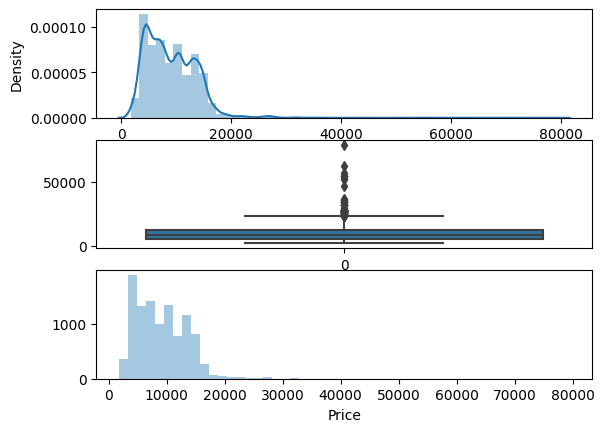

In [134]:
def plot(df1,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df1[col],ax=ax1)
    sns.boxplot(df1[col],ax=ax2)
    sns.distplot(df1[col],ax=ax3,kde=False)
plot(df,"Price")
plt.show();

In [135]:
df["Price"]=np.where(df["Price"]>=35000,df["Price"].median(),df["Price"])

In [136]:
df.drop(columns=["Source","Airline","Destination","Duration","Total_Stops"],axis=1,inplace=True)

In [137]:
df.head()

,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airlines,Destinations,Total_Stopss
0,3897.0,24,3,1,10,22,20,2,50,1,0,0,0,0,3,2,0
1,7662.0,5,1,13,15,5,50,7,25,0,0,0,1,0,7,3,2
2,13882.0,6,9,4,25,9,25,19,0,0,0,1,0,0,10,4,2
3,6218.0,5,12,23,30,18,5,5,25,0,0,0,1,0,3,3,1
4,13302.0,3,1,21,35,16,50,4,45,1,0,0,0,0,3,2,1


In [139]:
from sklearn.feature_selection import mutual_info_regression
X=df.drop(columns="Price",axis=1)
y=df["Price"]

,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airlines,Destinations,Total_Stopss
0,24,3,1,10,22,20,2,50,1,0,0,0,0,3,2,0
1,5,1,13,15,5,50,7,25,0,0,0,1,0,7,3,2
2,6,9,4,25,9,25,19,0,0,0,1,0,0,10,4,2
3,5,12,23,30,18,5,5,25,0,0,0,1,0,3,3,1
4,3,1,21,35,16,50,4,45,1,0,0,0,0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,9,22,25,19,55,2,30,0,0,0,1,0,2,3,0
10679,27,4,23,20,20,45,2,35,0,0,0,1,0,7,3,0
10680,27,4,11,20,8,20,3,0,1,0,0,0,0,10,2,0
10681,3,1,14,10,11,30,2,40,1,0,0,0,0,5,2,0


In [140]:
mutual_info_regression(X,y)

array([0.18954929, 0.23533801, 0.40045722, 0.35268011, 0.33540312,
       0.25845252, 0.47187957, 0.34537564, 0.38904422, 0.12848494,
       0.51900402, 0.45789338, 0.19450607, 0.96921518, 1.00668146,
       0.80078396])

In [144]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=["Importance"]

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [146]:
ml_model=RandomForestRegressor()
model=ml_model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [147]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [150]:
def predict(ml_model):
    model=ml_model.fit(X_train, y_train)
    print(f"Training score : {model.score(X_train, y_train)}")
    prediction=model.predict(X_test)
    print(f"Predictions are : {prediction}")
    print("\n")
    from sklearn import metrics as mt
    r2_score=mt.r2_score(y_test,prediction)
    print(f"r2_score : {r2_score}")
    MSE=mt.mean_squared_error(y_test,prediction)
    print(f"MSE : {MSE}")
    MAE=mt.mean_absolute_error(y_test,prediction)
    print(f"MAE : {MAE}")
    RMSE=np.sqrt(mt.mean_squared_error(y_test,prediction))
    print(f"RMSE : {MSE}")
    print(f"MAPE : {mape(y_test,prediction)}")
    


In [165]:
predict(RandomForestRegressor())

Training score : 0.9515255728312074
Predictions are : [16762.37  6430.94  8792.77 ...  3503.09  6213.88  6994.8 ]


r2_score : 0.80716369012845
MSE : 3754060.081538169
MAE : 1181.7867569554182
RMSE : 3754060.081538169
MAPE : 13.2376031917235


In [166]:
from sklearn.model_selection import RandomizedSearchCV
reg_ref=RandomForestRegressor()

In [167]:
np.linspace(start=1000,stop=1200,num=6)
n_estimator=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_spits=[5,10,15,100]

In [168]:

parameters={"n_estimators":n_estimator,
            "max_features":["auto","sqrt"],
            "max_depth":max_depth,
            "min_samples_split":min_samples_spits}

In [169]:
rf_Random=RandomizedSearchCV(reg_ref,param_distributions=parameters,cv=3,n_jobs=-1)
rf_Random.fit(X_train,y_train)

c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]})

In [170]:
rf_Random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [171]:
reg_ref_hiper=RandomForestRegressor(n_estimators=1200,min_samples_split=10,max_features="auto",max_depth=13)
predict(reg_ref_hiper)

c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Training score : 0.9049445809199853
Predictions are : [16473.85063684  6312.69411253  8631.67064632 ...  3936.84571727
  7251.91816423  7047.95483017]


r2_score : 0.8298699700524412
MSE : 3312023.3140867148
MAE : 1154.8823862929369
RMSE : 3312023.3140867148
MAPE : 12.983008469511317
